In [167]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.utils import resample


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from scipy import stats

In [168]:
#importing dataset
df = pd.read_csv("weatherAUS.csv")

In [169]:
#checking dataset
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [170]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [172]:
#replace no and yes with 0 and 1
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

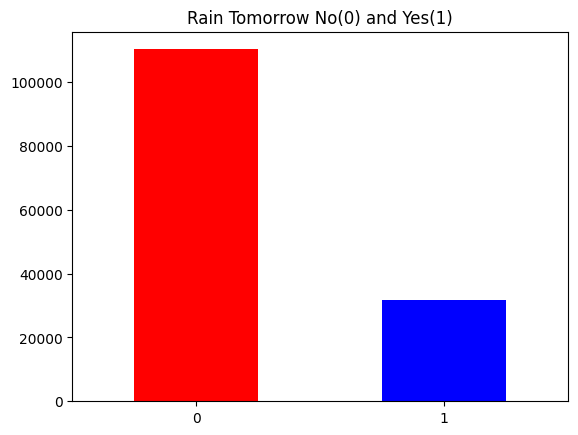

In [173]:
df['RainTomorrow'].value_counts().plot.bar(color= ['red','blue'], rot=0)
plt.title('Rain Tomorrow No(0) and Yes(1)')
plt.show()

In [174]:
df_no = df[df.RainTomorrow == 0]
df_yes = df[df.RainTomorrow == 1]
sample = resample(df_yes, replace=True, n_samples=len(df_no), random_state=123)
sampled_df = pd.concat([df_no, sample])

#verified that it's not equal in number of values in each field.
sampled_df['RainTomorrow'].value_counts()

0    110316
1    110316
Name: RainTomorrow, dtype: int64

In [175]:
#looking at percentages for missing data
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562


In [176]:
sampled_df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [181]:
for column in sampled_df.columns:
    if sampled_df.columns.dtype == 'object':
        sampled_df[column].fillna(sampled_df[column].mode()[0], inplace=True)
    else:
        none

In [180]:
for column in sampled_df[['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']]:
    mode = sampled_df[column].mode()
    sampled_df[column] = sampled_df[column].fillna(mode)

SyntaxError: 'return' outside function (1222605242.py, line 4)

In [178]:
sampled_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [179]:
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562


In [ ]:
# Impute categorical var with Mode
sampled_df['Date'] = sampled_df['Date'].fillna(sampled_df['Date'].mode()[0])
sampled_df['Location'] = sampled_df['Location'].fillna(sampled_df['Location'].mode()[0])
sampled_df['WindGustDir'] = sampled_df['WindGustDir'].fillna(sampled_df['WindGustDir'].mode()[0])
sampled_df['WindDir9am'] = sampled_df['WindDir9am'].fillna(sampled_df['WindDir9am'].mode()[0])
sampled_df['WindDir3pm'] = sampled_df['WindDir3pm'].fillna(sampled_df['WindDir3pm'].mode()[0])


In [ ]:
if dtypes == 'object' sampled_df[i].fillna

In [165]:
def fill_nan(sampled_df):
    for column in sampled_df.columns:
        if sampled_df.columns.dtype == 'object':
            sampled_df[column].fillna(sampled_df[column].mode()[0], inplace=True)
        return sampled_df

In [166]:
fill_nan(sampled_df)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,2010-06-08,Launceston,1.1,11.8,0.4,NaN,NaN,WNW,13.0,NaN,...,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,8.8,1
114384,2016-08-08,PearceRAAF,9.6,14.8,11.8,NaN,4.3,W,69.0,WNW,...,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,5.4,1
84962,2009-03-18,Cairns,24.8,31.5,0.0,5.4,3.4,SE,48.0,SSE,...,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,9.8,1
54992,2012-08-17,Ballarat,4.2,7.9,11.4,NaN,NaN,SW,63.0,NNW,...,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,18.4,1


In [161]:
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664
Pressure3pm,21746,0.098562


In [152]:
for column in df[['race', 'goal', 'date', 'go_out', 'career_c']]:
    mode = df[column].mode()
    df[column] = df[column].fillna(mode)

KeyError: "None of [Index(['race', 'goal', 'date', 'go_out', 'career_c'], dtype='object')] are in the [columns]"

In [ ]:
total = sampled_df.isnull().sum().sort_values(ascending=False)
percent = (sampled_df.isnull().sum()/sampled_df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

In [113]:
df1 = df

In [93]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['Day'] = df1['Date'].dt.day

df1.drop('Date',axis = 1, inplace =True)

In [94]:
#verifying changes
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,8.0,NaN,16.9,21.8,0.0,0.0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,NaN,NaN,17.2,24.3,0.0,0.0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,NaN,2.0,21.0,23.2,0.0,0.0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,NaN,NaN,18.1,26.5,0.0,1.0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,7.0,8.0,17.8,29.7,0.0,0.2,0,2008,12,5


In [95]:
#seperating null values
nan = pd.isnull(df1["RainToday"])
 
# displaying data only with raintoday = NaN
df1[nan]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
14,Albury,9.8,27.7,NaN,NaN,NaN,WNW,50.0,NaN,WNW,...,0.0,NaN,17.3,26.2,NaN,0.0,0,2008,12,16
282,Albury,NaN,18.8,NaN,NaN,NaN,N,31.0,SE,NNE,...,NaN,NaN,8.7,18.1,NaN,0.0,0,2009,9,11
433,Albury,21.7,35.6,NaN,NaN,NaN,SSW,46.0,NaN,S,...,NaN,4.0,25.2,32.9,NaN,0.0,0,2010,2,10
434,Albury,22.5,29.1,NaN,NaN,NaN,SW,24.0,NaN,NNW,...,NaN,7.0,23.4,26.4,NaN,0.0,0,2010,2,12
439,Albury,NaN,31.2,NaN,NaN,NaN,ESE,31.0,SSE,SSW,...,NaN,NaN,21.0,30.0,NaN,0.0,0,2010,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141678,Uluru,22.4,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,25.1,35.7,NaN,1.8,1,2016,1,21
141689,Uluru,20.6,32.6,NaN,NaN,NaN,S,39.0,SE,NE,...,NaN,NaN,22.6,30.0,NaN,0.0,0,2016,2,3
141693,Uluru,23.8,38.3,NaN,NaN,NaN,NaN,NaN,ESE,ESE,...,NaN,NaN,30.6,36.1,NaN,0.0,0,2016,2,8
141828,Uluru,3.2,17.9,NaN,NaN,NaN,E,44.0,SE,E,...,NaN,NaN,8.8,17.2,NaN,0.6,0,2016,6,24


In [96]:
#remove all nan values from rain today
df2 = df1.dropna(subset=['RainToday'])

In [97]:
#remove all nan values from rain tomorrow
df2 = df2.dropna(subset = ['RainTomorrow'])

In [98]:
#confirming nans removed from rain today and rain tomorrow
df2.isna().sum()

Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RISK_MM              0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

In [111]:
df3 = df2.drop(['Year', 'Month', 'Day', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)

Text(0.5, 1.0, 'Heatmap Correlation')

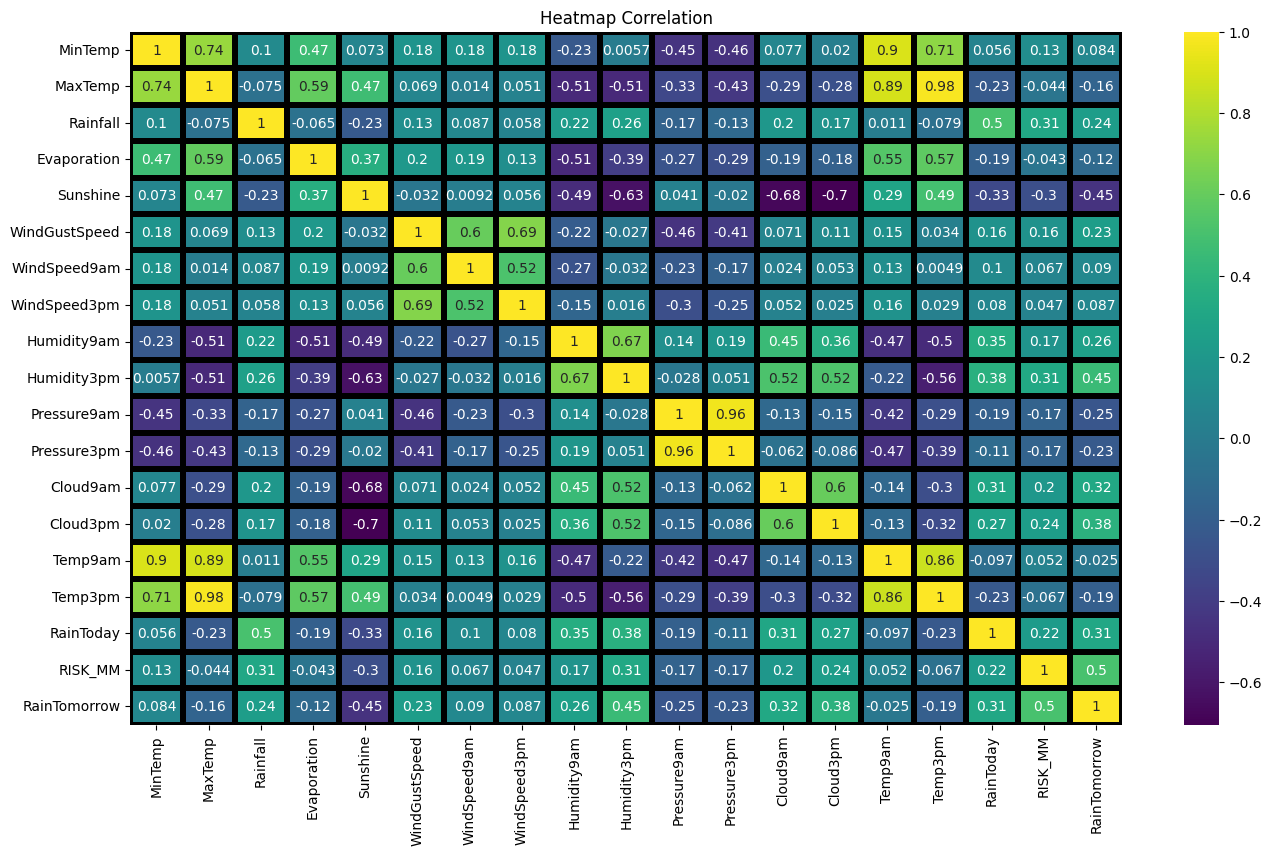

In [112]:
#heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df3.corr(), annot = True, linewidths=4, linecolor='k', cmap='viridis')
plt.title('Heatmap Correlation')

rain today's biggest correlation is with rainfall. While rain tomorrow's biggest correlations are humidity3pm, sunshine, and risk. 

In [ ]:
sns.pairplot(data = df3, vars = ('RainToday', 'RainTomorrow', 'Rainfall', 'Sunshine', 'Humidity3pm', 'RISK_MM'))

In [ ]:
sns.pairplot(data = df3, vars = ('RainToday', 'Rainfall', 'Sunshine', 'Humidity3pm', 'RISK_MM'), hue = 'RainTomorrow')

In [100]:
#setup x,y for split
x = df2.drop('RainTomorrow', axis=1)
y = df2['RainTomorrow']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
categorical_columns = x_train.select_dtypes(include=['object']).columns.tolist()
numeric_columns = x_train.select_dtypes(include=['int64', 'float64','int32']).columns.tolist()

In [103]:
numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),  # Impute missing values using IterativeImputer
    ('scaler', StandardScaler())       # Standardize numeric features
])

In [104]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
    ('encoder', OneHotEncoder(drop='first', sparse=False))  # One-hot encode categorical features
])

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('categorical', categorical_transformer, categorical_columns)
    ],
    remainder='drop'
)

In [106]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [107]:
pipeline.fit(x_train, y_train)

C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\brean\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   IterativeImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['MinTemp', 'MaxTemp',
                                                   'Rainfall', 'Evaporation',
                                                   'Sunshine', 'WindGustSpeed',
                                                   'WindSpeed9am',
                                                   'WindSpeed3pm',
                                                   'Humidity9am', 'Humidity3pm',
                                                   'Pressure9am', 'Pressure3pm',
                                                   'Cloud9am', 'Cloud3pm',
                                                   'Temp9am', 'Temp3pm',
                                                   'RainToday', 'RISK_MM',
                                                   'Year', 'Month', 'Day']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Location', 'WindGustDir',
                                                   'WindDir9am',
                                                   'WindDir3pm'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [108]:
y_pred = pipeline.predict(x_test)

In [109]:
accuracy = accuracy_score(y_test, y_pred)

In [110]:
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     21897
           1       1.00      1.00      1.00      6261

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158

Confusion Matrix:
 [[21897     0]
 [    1  6260]]
